In [1]:
from concurrent.futures import ProcessPoolExecutor, ThreadPoolExecutor

import psutil

from src.paths import TEST_IMAGE_FILEPATH
from src.processing import (
    process_images_sequential,
    process_images_parallel_pooled,
    process_images_parallel_conveyors,
)
from src.transformations import (
    convert_to_bw,
    apply_blur,
    apply_noise
)
from src.utils import (
    load_image,
    show_image,
    download_dataset_from_dropbox,
    run_testing
)

NUM_PHYSICAL_CORES = psutil.cpu_count(logical=False)
print("Number of Physical Cores:", NUM_PHYSICAL_CORES)

NUM_LOGICAL_CORES = psutil.cpu_count(logical=True)
print("Number of Logical Cores:", NUM_LOGICAL_CORES)

Number of Physical Cores: 8
Number of Logical Cores: 16


In [2]:
download_dataset_from_dropbox(
    url=r"https://www.dropbox.com/s/1eb7fx9bqr85cfo/data_set_VU_test1.zip?raw=1")

Dataset already exists


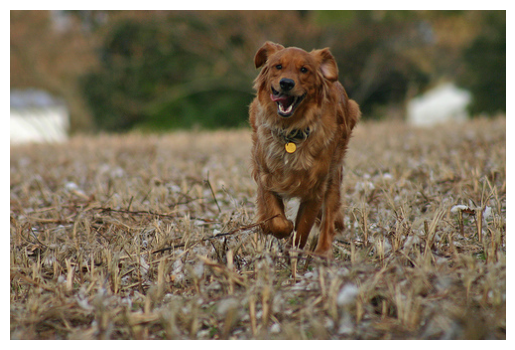

In [3]:
image = load_image(TEST_IMAGE_FILEPATH)
show_image(image)

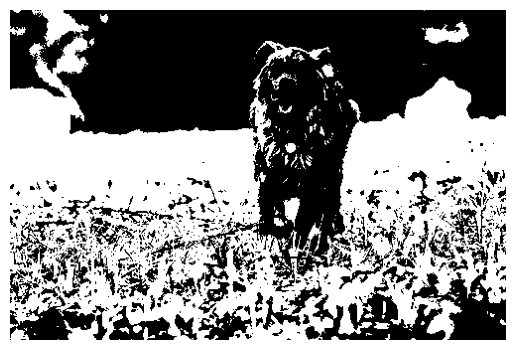

In [4]:
bw_image = convert_to_bw(image)
show_image(bw_image)

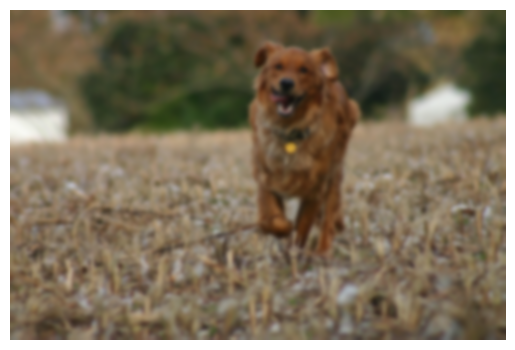

In [5]:
blurred_image = apply_blur(image, kernel_size=11)
show_image(blurred_image)

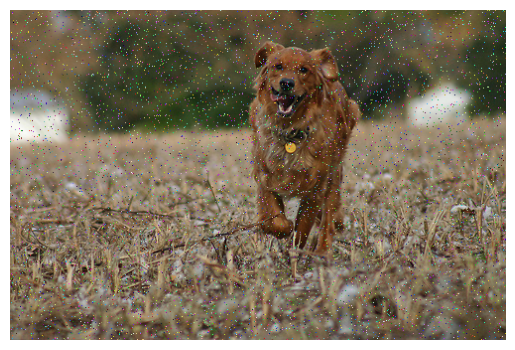

In [6]:
image_with_noise = apply_noise(image, noise_fraction=0.1)
show_image(image_with_noise)

In [7]:
process_images_sequential(transform=convert_to_bw)
process_images_sequential(transform=apply_blur)
process_images_sequential(transform=apply_noise);

Function process_images_sequential with args ['convert_to_bw'] took 35.2267 seconds
Function process_images_sequential with args ['apply_blur'] took 40.3114 seconds
Function process_images_sequential with args ['apply_noise'] took 74.2473 seconds


Function process_images_parallel_pooled with args ['ThreadPoolExecutor', 'convert_to_bw'] took 18.7294 seconds
Function process_images_parallel_pooled with args ['ThreadPoolExecutor', 'convert_to_bw'] took 10.0103 seconds
Function process_images_parallel_pooled with args ['ThreadPoolExecutor', 'convert_to_bw'] took 5.9875 seconds
Function process_images_parallel_pooled with args ['ThreadPoolExecutor', 'convert_to_bw'] took 4.8251 seconds
Function process_images_parallel_pooled with args ['ThreadPoolExecutor', 'apply_blur'] took 22.9916 seconds
Function process_images_parallel_pooled with args ['ThreadPoolExecutor', 'apply_blur'] took 12.7415 seconds
Function process_images_parallel_pooled with args ['ThreadPoolExecutor', 'apply_blur'] took 8.4364 seconds
Function process_images_parallel_pooled with args ['ThreadPoolExecutor', 'apply_blur'] took 5.4009 seconds
Function process_images_parallel_pooled with args ['ThreadPoolExecutor', 'apply_noise'] took 44.2779 seconds
Function process_im

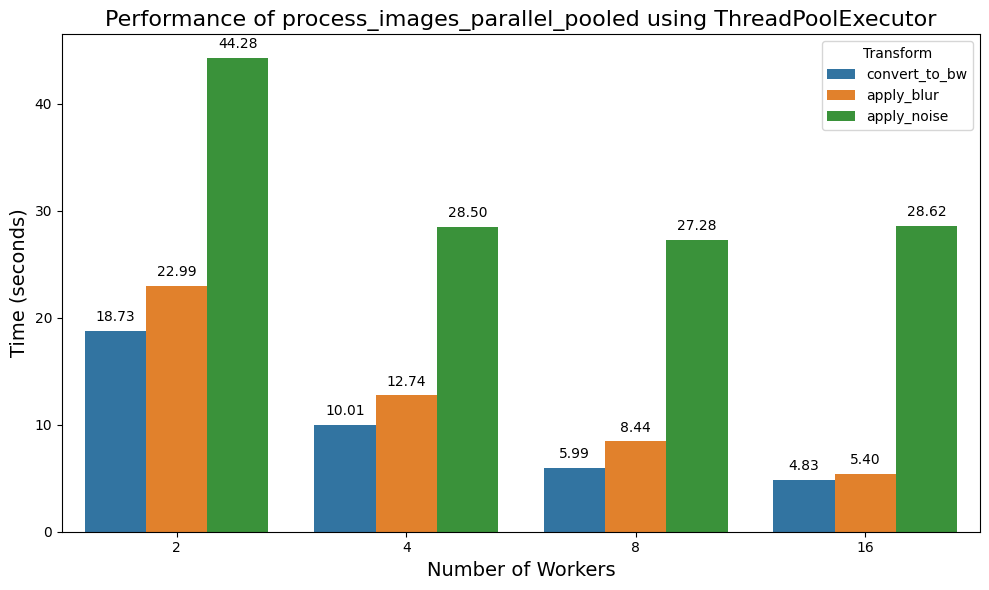

In [8]:
run_testing(
    function=process_images_parallel_pooled,
    pool_executor=ThreadPoolExecutor,
    transforms=[convert_to_bw, apply_blur, apply_noise],
    max_workers=NUM_LOGICAL_CORES
)

Function process_images_parallel_pooled with args ['ProcessPoolExecutor', 'convert_to_bw'] took 21.1303 seconds
Function process_images_parallel_pooled with args ['ProcessPoolExecutor', 'convert_to_bw'] took 11.8835 seconds
Function process_images_parallel_pooled with args ['ProcessPoolExecutor', 'convert_to_bw'] took 8.5824 seconds
Function process_images_parallel_pooled with args ['ProcessPoolExecutor', 'apply_blur'] took 24.6255 seconds
Function process_images_parallel_pooled with args ['ProcessPoolExecutor', 'apply_blur'] took 15.7170 seconds
Function process_images_parallel_pooled with args ['ProcessPoolExecutor', 'apply_blur'] took 11.3590 seconds
Function process_images_parallel_pooled with args ['ProcessPoolExecutor', 'apply_noise'] took 41.9492 seconds
Function process_images_parallel_pooled with args ['ProcessPoolExecutor', 'apply_noise'] took 23.1029 seconds
Function process_images_parallel_pooled with args ['ProcessPoolExecutor', 'apply_noise'] took 14.3201 seconds


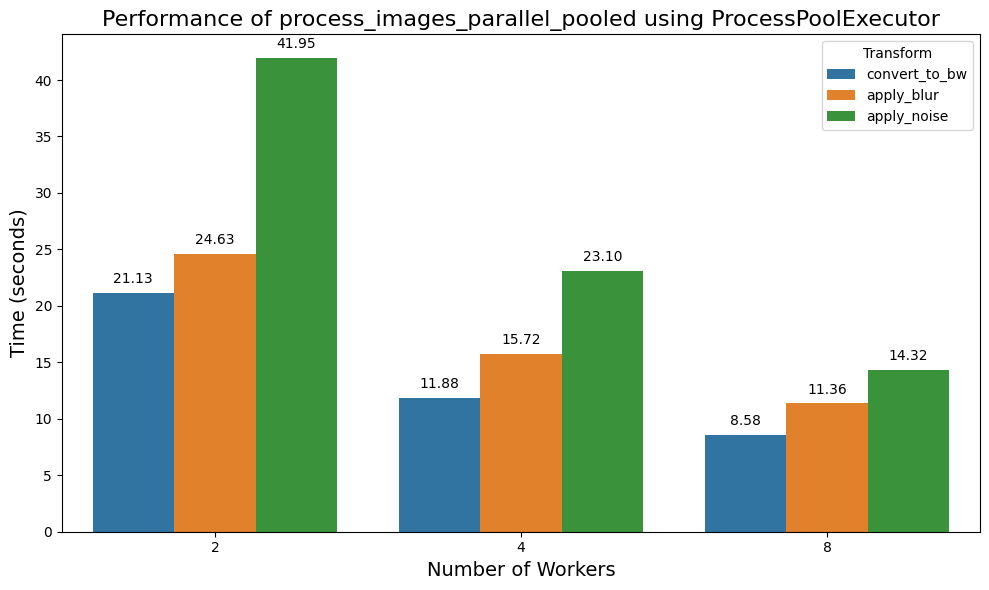

In [9]:
run_testing(
    function=process_images_parallel_pooled,
    pool_executor=ProcessPoolExecutor,
    transforms=[convert_to_bw, apply_blur, apply_noise],
    max_workers=NUM_PHYSICAL_CORES
)

Function process_images_parallel_conveyors with args ['convert_to_bw'] took 11.9042 seconds
Function process_images_parallel_conveyors with args ['convert_to_bw'] took 9.4336 seconds
Function process_images_parallel_conveyors with args ['convert_to_bw'] took 7.0196 seconds
Function process_images_parallel_conveyors with args ['apply_blur'] took 15.0368 seconds
Function process_images_parallel_conveyors with args ['apply_blur'] took 11.9535 seconds
Function process_images_parallel_conveyors with args ['apply_blur'] took 8.4325 seconds
Function process_images_parallel_conveyors with args ['apply_noise'] took 19.0229 seconds
Function process_images_parallel_conveyors with args ['apply_noise'] took 13.9880 seconds
Function process_images_parallel_conveyors with args ['apply_noise'] took 11.4774 seconds


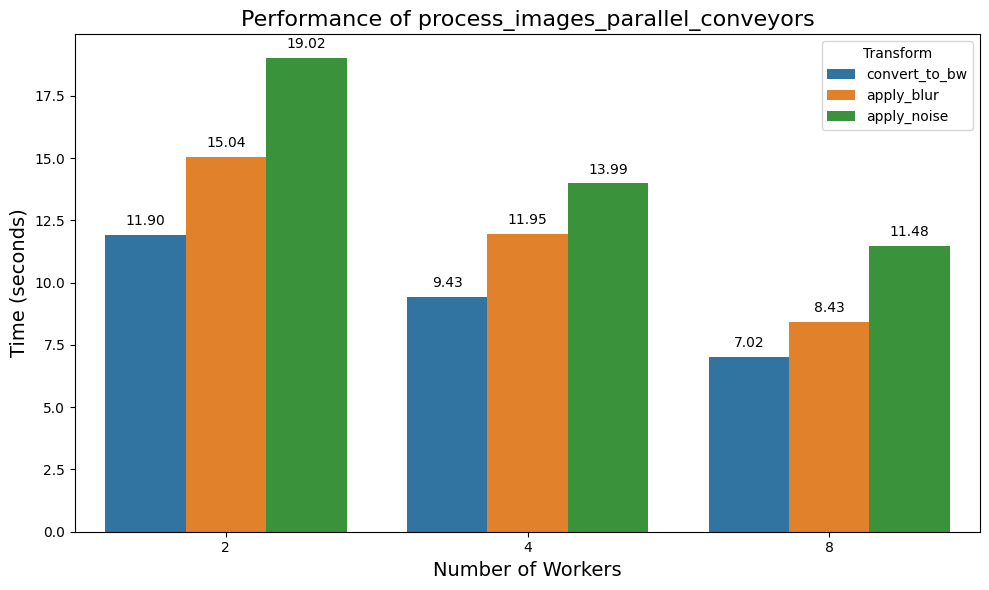

In [10]:
run_testing(
    function=process_images_parallel_conveyors,
    transforms=[convert_to_bw, apply_blur, apply_noise],
    max_workers=NUM_PHYSICAL_CORES
)